# DATA MODEL - GOAL

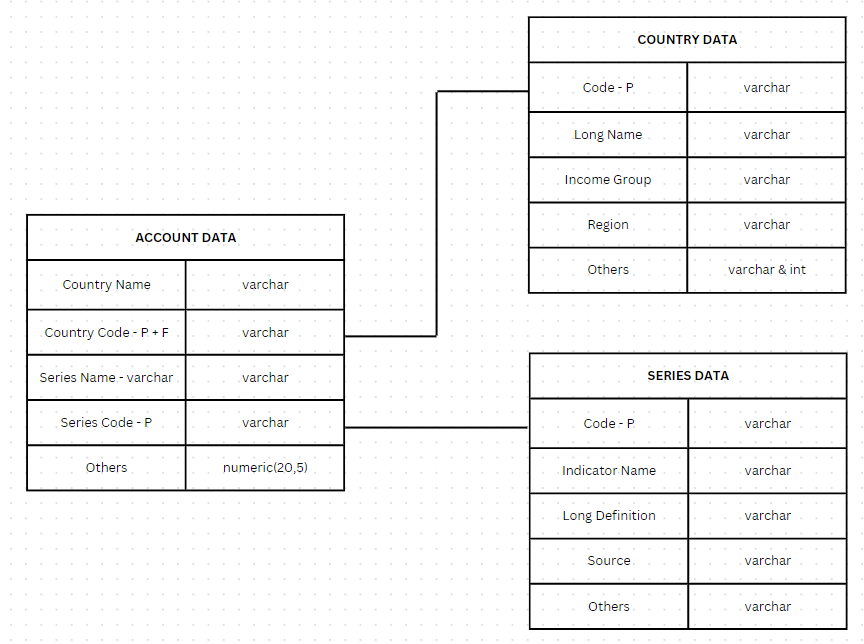

In [1]:
import pandas as pd
import psycopg2
import numpy as np

# DATA COLLECTION 

In [2]:
accounts = pd.read_csv("Wealth-AccountData.csv")

In [12]:
countries = pd.read_csv("Wealth-AccountsCountry.csv")

In [30]:
series = pd.read_csv("Wealth-AccountSeries.csv")

# DATA CLEANING

In [3]:
accounts.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '1995 [YR1995]', '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]',
       '1999 [YR1999]', '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]',
       '2003 [YR2003]', '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]',
       '2007 [YR2007]', '2008 [YR2008]', '2009 [YR2009]', '2010 [YR2010]',
       '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]'],
      dtype='object')

In [4]:
accounts.shape

(7592, 28)

In [5]:
# Selecting relevant columns
accounts = accounts[['Country Name', 'Country Code', 'Series Name', 'Series Code', '2018 [YR2018]']]

In [6]:
accounts.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2018 [YR2018]'],
      dtype='object')

In [7]:
accounts.columns = ['Country Name', 'Country Code', 'Series Name', 'Series Code', 'YR2018']

In [8]:
accounts.head()

,Country Name,Country Code,Series Name,Series Code,YR2018
0,Albania,ALB,Human capital (constant 2018 US$),NW.HCA.TO,8.12E+10
1,Albania,ALB,Human capital per capita (constant 2018 US$),NW.HCA.PC,28333.68
2,Albania,ALB,"Human capital per capita, employed female (con...",NW.HCA.FEMP.PC,3312.927
3,Albania,ALB,"Human capital per capita, employed male (const...",NW.HCA.MEMP.PC,19245.19
4,Albania,ALB,"Human capital per capita, female (constant 201...",NW.HCA.FEMA.PC,4161.137


In [9]:
# Handling missing values
missing_rows = accounts[accounts.YR2018==".."]
missing_rows

,Country Name,Country Code,Series Name,Series Code,YR2018
546,Belize,BLZ,"Natural capital per capita, nonrenewable asset...",NW.NCA.SAGA.PC,..
561,Belize,BLZ,"Natural capital, nonrenewable assets: gas (con...",NW.NCA.SAGA.TO,..
910,Burkina Faso,BFA,"Natural capital per capita, nonrenewable asset...",NW.NCA.SAGA.PC,..
925,Burkina Faso,BFA,"Natural capital, nonrenewable assets: gas (con...",NW.NCA.SAGA.TO,..
962,Burundi,BDI,"Natural capital per capita, nonrenewable asset...",NW.NCA.SAGA.PC,..
...,...,...,...,...,...
6697,The Gambia,GMB,"Natural capital, nonrenewable assets: gas (con...",NW.NCA.SAGA.TO,..
6994,Uganda,UGA,"Natural capital per capita, nonrenewable asset...",NW.NCA.SAGA.PC,..
7009,Uganda,UGA,"Natural capital, nonrenewable assets: gas (con...",NW.NCA.SAGA.TO,..
7410,West Bank and Gaza,PSE,"Natural capital per capita, nonrenewable asset...",NW.NCA.SAGA.PC,..


In [10]:
accounts.drop(missing_rows.index, inplace=True)

In [11]:
# Changing data type
accounts.YR2018 = pd.to_numeric(accounts.YR2018)

In [13]:
accounts.duplicated().sum()

0

In [15]:
accounts.isna().sum()

Country Name    0
Country Code    0
Series Name     0
Series Code     0
YR2018          0
dtype: int64

In [16]:
countries.columns

Index(['Code', 'Long Name', 'Income Group', 'Region', 'Lending category',
       'Other groups', 'Currency Unit', 'Latest population census',
       'Latest household survey', 'Special Notes',
       'National accounts base year', 'National accounts reference year',
       'System of National Accounts', 'SNA price valuation',
       'Alternative conversion factor', 'PPP survey years',
       'Balance of Payments Manual in use', 'External debt Reporting status',
       'System of trade', 'Government Accounting concept',
       'IMF data dissemination standard',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', '2-alpha code', 'WB-2 code',
       'Table Name', 'Short Name'],
      dtype='object')

In [17]:
# Selecting relevant columns
countries = countries[['Code', 'Long Name', 'Income Group', 'Region']]

In [18]:
countries.shape

(7597, 4)

In [19]:
# Handling diplicate values
countries.duplicated().sum()

7304

In [20]:
countries.drop_duplicates(inplace=True)

In [21]:
countries.duplicated().sum()

0

In [22]:
# Handling NA values
countries.isna().sum()

Code              3
Long Name         1
Income Group      2
Region          147
dtype: int64

In [23]:
countries.Region.fillna("not available", inplace=True)

In [24]:
countries.isna().sum()

Code            3
Long Name       1
Income Group    2
Region          0
dtype: int64

In [25]:
countries.dropna(inplace=True)

In [26]:
countries.isna().sum()

Code            0
Long Name       0
Income Group    0
Region          0
dtype: int64

In [27]:
countries.Code.duplicated().sum()

143

In [28]:
countries.drop_duplicates(subset=['Code'], inplace=True)

In [29]:
countries.Code.duplicated().sum()

0

In [31]:
series.columns

Index(['Code', 'Indicator Name', 'Long definition', 'Source', 'Topic',
       'Unit of measure', 'Periodicity', 'Reference period',
       'Statistical concept and methodology', 'Previous Indicator Code',
       'Previous Indicator Name'],
      dtype='object')

In [32]:
# Selecting relevant columns
series = series[['Code', 'Indicator Name']]

In [33]:
series.head()

,Code,Indicator Name
0,NW.HCA.TO,Human capital (constant 2018 US$)
1,NW.HCA.PC,Human capital per capita (constant 2018 US$)
2,NW.HCA.FEMP.PC,"Human capital per capita, employed female (con..."
3,NW.HCA.MEMP.PC,"Human capital per capita, employed male (const..."
4,NW.HCA.FEMA.PC,"Human capital per capita, female (constant 201..."


In [34]:
series.duplicated().sum()

0

In [35]:
series.Code.duplicated().sum()

0

In [36]:
series.isna().sum()

Code              0
Indicator Name    0
dtype: int64

# SETTING UP NEW DATABASE

In [21]:
# Creating a connection to the database
try:
    conn = psycopg2.connect("host=127.0.0.1 dbname=postgres user=postgres password=Shivam@123456")
    print("connected")
except psycopg2.Error as e:
    print(e)

In [22]:
# Setting up a cursor (to execute queries)
try:
    cur = conn.cursor()
    print("cursor created")
except psycopg2.Error as e:
    print(e)
    
conn.set_session(autocommit=True)

In [23]:
# Setting up autocommit
try:
    conn.set_session(autocommit=True)
    print("autocommit done")
except psycopg2.Error as e:
    print(e)

In [24]:
# Creating new database
query2 = "create database wealthdb"
try:
    cur.execute(query)
    print("db created")
except psycopg2.Error as e:
    print(e)

In [25]:
#closing connection with existing database
try:
    conn.close()
    print("connection closed")
except psycopg2.Error as e:
    print(e)

# WORKING ON NEW DATABASE

In [37]:
# making connection with newly created wealthdb
try:
    conn = psycopg2.connect("host=127.0.0.1 dbname=wealthdb user=postgres password=Shivam@123456")
    print("connected")
except psycopg2.Error as e:
    print(e)

connected


In [38]:
# adding cursor and autocommit
try:
    cur = conn.cursor()
    print("cursor created")
except psycopg2.Error as e:
    print(e)
    
conn.set_session(autocommit=True)

cursor created


In [39]:
# creating a table
query1 = "drop table countries"
query2 = "create table countries (country_code varchar primary key, country_name varchar, \
        income_group varchar, region varchar)"

try:
    cur.execute(query1)
    cur.execute(query2)
except psycopg2.Error as e:
    print(e)

In [40]:
# Inserting data into table
query = '''
    INSERT INTO countries (country_code, country_name, income_group, region)
    VALUES (%s, %s, %s, %s)
    '''

for i in range(len(countries)):
    row = countries.iloc[i]
    
    try:
        cur.execute(query, (row['Code'], row['Long Name'], row['Income Group'], row['Region']))
    except psycopg2.Error as e:
        print(e)

In [41]:
# Displaying table content
query = "select * from countries"

try:
    cur.execute(query)
except psycopg2.Error as e:
    print(e)
    
rows = cur.fetchall()
for i in rows:
    print(i)

('ALB', 'Republic of Albania', 'Upper middle income', 'Europe & Central Asia')
('ARG', 'Argentine Republic', 'Upper middle income', 'Latin America & Caribbean')
('ARM', 'Republic of Armenia', 'Upper middle income', 'Europe & Central Asia')
('AUS', 'Commonwealth of Australia', 'High income', 'East Asia & Pacific')
('AUT', 'Republic of Austria', 'High income', 'Europe & Central Asia')
('AZE', 'Republic of Azerbaijan', 'Upper middle income', 'Europe & Central Asia')
('BHR', 'Kingdom of Bahrain', 'High income', 'Middle East & North Africa')
('BGD', "People's Republic of Bangladesh", 'Lower middle income', 'South Asia')
('BLR', 'Republic of Belarus', 'Upper middle income', 'Europe & Central Asia')
('BEL', 'Kingdom of Belgium', 'High income', 'Europe & Central Asia')
('BLZ', 'Belize', 'Lower middle income', 'Latin America & Caribbean')
('BEN', 'Republic of Benin', 'Lower middle income', 'Sub-Saharan Africa')
('BOL', 'Plurinational State of Bolivia', 'Lower middle income', 'Latin America & Ca

In [42]:
# Creating a table
query1 = "drop table series"
query2 = "create table series (series_code varchar primary key, series_name varchar)"

try:
    cur.execute(query1)
    cur.execute(query2)
except psycopg2.Error as e:
    print(e)

In [43]:
# Inserting data into table
query = '''
    INSERT INTO series (series_code, series_name)
    VALUES (%s, %s)
    '''

for i in range(len(series)):
    row = series.iloc[i]
    
    try:
        cur.execute(query, (row['Code'], row['Indicator Name']))
    except psycopg2.Error as e:
        print(e)

In [44]:
# Displaying table content
query = "select * from series"

try:
    cur.execute(query)
except psycopg2.Error as e:
    print(e)
    
rows = cur.fetchall()
for i in rows:
    print(i)

('NW.HCA.TO', 'Human capital (constant 2018 US$)')
('NW.HCA.PC', 'Human capital per capita (constant 2018 US$)')
('NW.HCA.FEMP.PC', 'Human capital per capita, employed female (constant 2018 US$)')
('NW.HCA.MEMP.PC', 'Human capital per capita, employed male (constant 2018 US$)')
('NW.HCA.FEMA.PC', 'Human capital per capita, female (constant 2018 US$)')
('NW.HCA.MALE.PC', 'Human capital per capita, male (constant 2018 US$)')
('NW.HCA.FSEM.PC', 'Human capital per capita, self-employed female (constant 2018 US$)')
('NW.HCA.MSEM.PC', 'Human capital per capita, self-employed male (constant 2018 US$)')
('NW.HCA.FEMP.TO', 'Human capital, employed female (constant 2018 US$)')
('NW.HCA.MEMP.TO', 'Human capital, employed male (constant 2018 US$)')
('NW.HCA.FEMA.TO', 'Human capital, female (constant 2018 US$)')
('NW.HCA.MALE.TO', 'Human capital, male (constant 2018 US$)')
('NW.HCA.FSEM.TO', 'Human capital, self-employed female (constant 2018 US$)')
('NW.HCA.MSEM.TO', 'Human capital, self-employed 

In [45]:
# Creating a table
query = "CREATE TABLE accounts (country_name VARCHAR, country_code VARCHAR, series_name VARCHAR, \
        series_code VARCHAR, yr2018 NUMERIC(20, 5), PRIMARY KEY (country_code, series_code),  \
        FOREIGN KEY (country_code) REFERENCES countries(country_code), \
        FOREIGN KEY (series_code) REFERENCES series(series_code))"

try:
    cur.execute(query)
except psycopg2.Error as e:
    print(e)

In [46]:
# Inserting data into table
query = '''
    INSERT INTO accounts (country_name, country_code, series_name, series_code, yr2018)
    VALUES (%s, %s, %s, %s, %s)
    '''

for i in range(len(accounts)):
    row = accounts.iloc[i]
    
    try:
        cur.execute(query, (row['Country Name'], row['Country Code'], row['Series Name'], \
                            row['Series Code'], row['YR2018']))
    except psycopg2.Error as e:
        print(e)

In [47]:
# Displaying table content
query = "select * from accounts limit 10"

try:
    cur.execute(query)
except psycopg2.Error as e:
    print(e)
    
rows = cur.fetchall()
for i in rows:
    print(i)

('Albania', 'ALB', 'Human capital (constant 2018 US$)', 'NW.HCA.TO', Decimal('81200000000.00000'))
('Albania', 'ALB', 'Human capital per capita (constant 2018 US$)', 'NW.HCA.PC', Decimal('28333.68000'))
('Albania', 'ALB', 'Human capital per capita, employed female (constant 2018 US$)', 'NW.HCA.FEMP.PC', Decimal('3312.92700'))
('Albania', 'ALB', 'Human capital per capita, employed male (constant 2018 US$)', 'NW.HCA.MEMP.PC', Decimal('19245.19000'))
('Albania', 'ALB', 'Human capital per capita, female (constant 2018 US$)', 'NW.HCA.FEMA.PC', Decimal('4161.13700'))
('Albania', 'ALB', 'Human capital per capita, male (constant 2018 US$)', 'NW.HCA.MALE.PC', Decimal('24172.54000'))
('Albania', 'ALB', 'Human capital per capita, self-employed female (constant 2018 US$)', 'NW.HCA.FSEM.PC', Decimal('848.21040'))
('Albania', 'ALB', 'Human capital per capita, self-employed male (constant 2018 US$)', 'NW.HCA.MSEM.PC', Decimal('4927.35500'))
('Albania', 'ALB', 'Human capital, employed female (constant

# CHECKING DATA MODEL

In [72]:
# Using join to check tables
query = '''
    SELECT accounts.country_name, accounts.series_code, countries.income_group, series.series_name, accounts.yr2018
    FROM accounts
    JOIN countries ON accounts.country_code = countries.country_code
    JOIN series ON accounts.series_code = series.series_code;
'''

try:
    cur.execute(query)
except psycopg2.Error as e:
    print(e)
    
rows = cur.fetchall()
    
column_names = [desc[0] for desc in cur.description]
df = pd.DataFrame(rows, columns=column_names)
df.head()

,country_name,series_code,income_group,series_name,yr2018
0,Albania,NW.HCA.TO,Upper middle income,Human capital (constant 2018 US$),81200000000.00000
1,Albania,NW.HCA.PC,Upper middle income,Human capital per capita (constant 2018 US$),28333.68000
2,Albania,NW.HCA.FEMP.PC,Upper middle income,"Human capital per capita, employed female (con...",3312.92700
3,Albania,NW.HCA.MEMP.PC,Upper middle income,"Human capital per capita, employed male (const...",19245.19000
4,Albania,NW.HCA.FEMA.PC,Upper middle income,"Human capital per capita, female (constant 201...",4161.13700


Accesing databse using sql shell
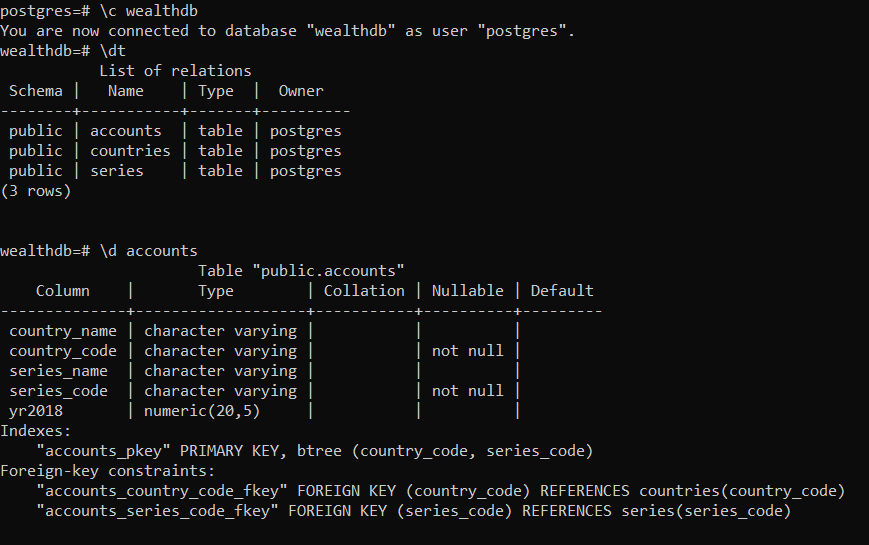